Imports

In [ ]:
import os
from google.colab import drive
import pandas as pd
from pandas import DataFrame
from math import sqrt
from random import seed
from random import randrange

from numpy import mean
from numpy import std
from numpy import absolute
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

np.random.seed(0)
plt.style.use('ggplot')

Mount Google Drive where the csv file is saved.

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'DI/Colab Notebooks/ex1'

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv(base_dir + 'HousingData.csv')

print((data.columns).tolist())

data = data.drop(['Unnamed: 0'], axis=1)

data

['Unnamed: 0', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'Median House Value']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median House Value
0,3.9816,27.0,4.928668,1.122476,3009.0,4.049798,33.73,-117.93,1.795
1,3.4531,23.0,4.021339,1.099338,2511.0,1.847682,34.14,-118.13,2.109
2,6.3942,4.0,5.681272,1.095774,5613.0,2.176425,37.78,-121.95,3.567
3,2.2243,32.0,5.685221,1.009597,1542.0,2.959693,38.69,-121.45,0.892
4,3.0217,9.0,5.006324,1.071146,3265.0,2.581028,37.69,-121.04,1.609
...,...,...,...,...,...,...,...,...,...
16507,5.7214,16.0,6.231429,0.917143,1133.0,3.237143,34.12,-117.68,2.594
16508,2.7254,41.0,3.834829,0.985637,986.0,1.770197,34.02,-118.47,4.444
16509,2.5288,16.0,5.315638,1.060258,2463.0,3.533716,36.98,-120.05,0.618
16510,2.6165,34.0,4.593168,1.031056,1166.0,3.621118,33.89,-118.24,1.009


No empty rows.

In [ ]:
data.isna().sum()

MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
Median House Value    0
dtype: int64

Functions that scale and split the data, apart from the targets.

In [ ]:
def scaleData(data, colNames, scaleFun):
  
  scaler = scaleFun()
  
  data = scaler.fit_transform(data)
  data = DataFrame(data)

  data.columns = colNames

  return data

def MakeSets(data, Labels):
  Train_X, Test_X, Train_Y, Test_Y = train_test_split(data, Labels, test_size=0.2, random_state=42)

  Encoder = LabelEncoder()
  Train_Y = Encoder.fit_transform(Train_Y)
  Test_Y = Encoder.fit_transform(Test_Y)

  return Train_X, Test_X, Train_Y, Test_Y

def finalizeData(data):  # doesn t scale last col

  allCols = data.columns

  dfColstmp = allCols.to_list()

  lastColName = dfColstmp[-1]

  lastColDat = data[lastColName]

  col_tem = dfColstmp

  col_tem.remove(lastColName)

  # data = scaleData(data.loc[:, data.columns != lastColName], col_tem, Normalizer)
  # data = scaleData(data.loc[:, data.columns != lastColName], col_tem, MinMaxScaler)
  data = scaleData(data.loc[:, data.columns != lastColName], col_tem, StandardScaler)

  data[lastColName] = lastColDat

  return data

Final dataframe, ready for regression.

In [ ]:
data = finalizeData(data)

data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median House Value
0,0.064942,-0.126271,-0.196236,0.051740,1.373549,0.092239,-0.891820,0.818449,1.795
1,-0.215122,-0.443353,-0.551700,0.004939,0.940366,-0.112032,-0.699628,0.718362,2.109
2,1.343433,-1.949497,0.098612,-0.002270,3.638627,-0.081537,1.006655,-1.193288,3.567
3,-0.866291,0.270083,0.100159,-0.176573,0.097486,-0.008880,1.433226,-0.943072,0.892
4,-0.443731,-1.553144,-0.165812,-0.052082,1.596229,-0.044006,0.964467,-0.737895,1.609
...,...,...,...,...,...,...,...,...,...
16507,0.986901,-0.998248,0.314147,-0.363572,-0.258281,0.016856,-0.709004,0.943557,2.594
16508,-0.600747,0.983520,-0.624769,-0.225034,-0.386149,-0.119219,-0.755880,0.548216,4.444
16509,-0.704929,-0.998248,-0.044632,-0.074104,0.898613,0.044367,0.631648,-0.242467,0.618
16510,-0.658455,0.428625,-0.327675,-0.133169,-0.229576,0.052474,-0.816818,0.663315,1.009


Sklearn ridge function on our data.

Mean MAE: 0.534 (0.009)
R2 score -0.8153271840625449


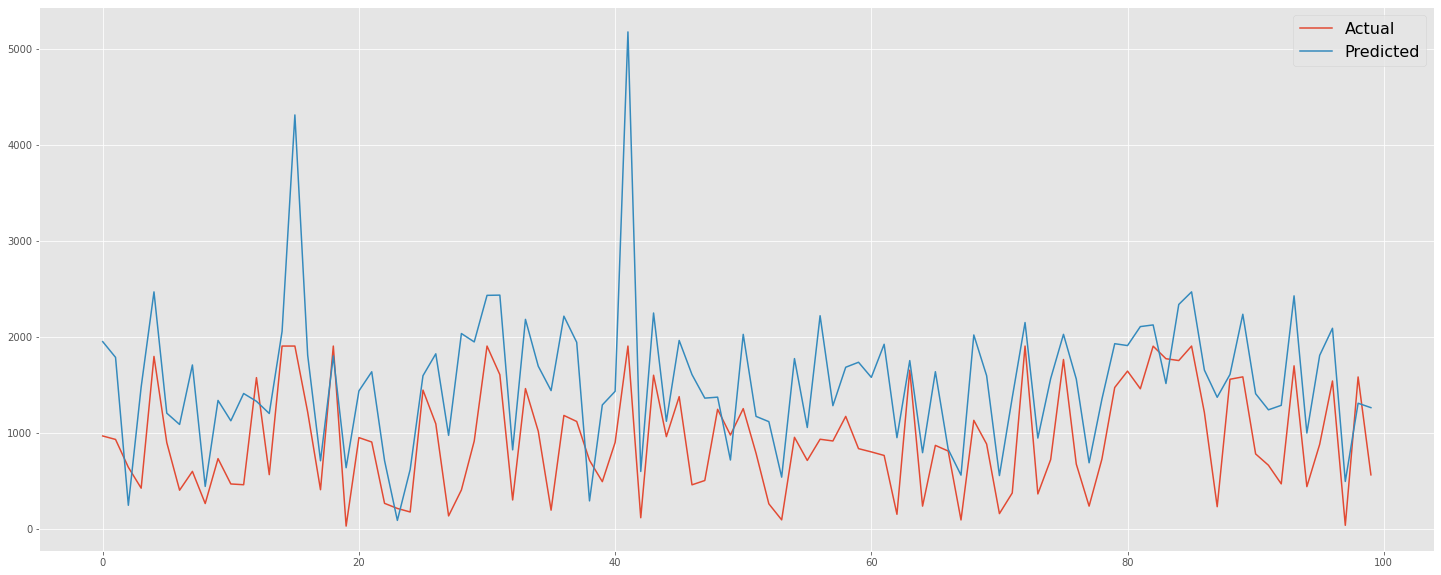

In [ ]:
tmpData = data.values

X, y = tmpData[:, :-1], tmpData[:, -1]
Train_X, Test_X, Train_Y, Test_Y = MakeSets(X, y)

# define model
model = Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
model.fit(Train_X, Train_Y)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

# # Prediction on test set 
Y_pred = model.predict( Test_X )

# print(np.sqrt(mean_squared_error(Test_Y, Y_pred))) 
print("R2 score", r2_score(Test_Y, Y_pred))

plt.figure(figsize=(25,10))
plt.plot(Test_Y[:100], label='Actual')
plt.plot(Y_pred[:100], label='Predicted')
plt.legend(prop={'size': 16})
plt.show()

Gradient Classes. Implementation of Gradient Descent, Mini-Batch Gradient Descent, SGD, with prediction functions and plot functions that visualize the error and the difference between acual and predicted labels. Function create_mini_batches(self, X, y, batch_size) was studied from https://www.geeksforgeeks.org/ml-mini-batch-gradient-descent-with-python/. Stohastic Gradient Descent was studied from https://towardsdatascience.com/implementing-sgd-from-scratch-d425db18a72c.

In [ ]:
class GradientDescent:

  def __init__(self, X, y, learning_rate = 0.1, steps=1000, batch_size = 32, max_iters=3, typeGD=None, n_epochs=1000, k=40):
    self.X = X
    self.XTmp = np.c_[ self.X, np.ones(self.X.shape[0]) ] #add a column of ones to X for the bias term
    self.y = y
    self.learning_rate = learning_rate
    self.steps = steps
    self.max_iters = max_iters
    self.batch_size = batch_size
    self.error_list = []
    self.theta = np.zeros((self.XTmp.shape[1], 1))   #create inital weights w0, w1..wd

    if typeGD == None or typeGD == 'GD':

      for s in range(self.steps):
        self.theta = self.theta - self.learning_rate * self.gradient(self.XTmp, self.y, self.theta) 
        self.error_list.append(self.cost(self.XTmp, self.y, self.theta)) #useful for plotting changes when using different batch sizes
    
    elif typeGD == 'Mini Batch':
      

      for itr in range(self.max_iters):
          self.mini_batches = self.create_mini_batches(self.XTmp, self.y, self.batch_size) 
          for mini_batch in self.mini_batches:
              X_mini, y_mini = mini_batch 
              self.theta = self.theta - self.learning_rate * self.gradient(X_mini, y_mini, self.theta)
              self.error_list.append(self.cost(X_mini, y_mini, self.theta))
    elif typeGD == 'SGD':
      self.theta = np.zeros((1, self.XTmp.shape[1]))
      b = np.random.randn(1,1)   # Random intercept value
      epoch=1
        
      while epoch <= n_epochs:
        X_tr, _, y_tr, _ = train_test_split(self.XTmp, self.y, test_size=0.2, random_state=42)
        Lw = self.theta
        Lb = b
        y_pred = []
            
        for i in range(k):
          Lw = (-2/k * X_tr[i]) * (y_tr[i] - np.dot(X_tr[i], self.theta.T) - b)
          Lb = (-2/k) * (y_tr[i] - np.dot(X_tr[i], self.theta.T) - b)
                
          self.theta = self.theta - self.learning_rate * Lw
          b = b - self.learning_rate * Lb
                
          y_predicted = np.dot(X_tr[i], self.theta.T)
          y_pred.append(y_predicted)

          self.error_list.append(self.cost(self.XTmp, self.y, self.theta.reshape((self.theta.shape[1],1))))

        self.learning_rate = self.learning_rate/1.02
        epoch+=1

      self.theta = self.theta.reshape((self.theta.shape[1],1))

  def get_params(self, deep=True):
    # suppose this estimator has parameters "alpha" and "recursive"
    return {"learning_rate": self.learning_rate, "steps": self.steps, "X": self.X, "y": self.y}

  def set_params(self, **parameters):
    for parameter, value in parameters.items():
        setattr(self, parameter, value)
    return self

  def fit(self, X, y):
    # self.classes_ = unique_labels(y)
    
    self.X_ = X
    self.y_ = y
    # Return the classifier
    return self

  # function to create a list containing mini-batches 
  def create_mini_batches(self, X, y, batch_size): 
    mini_batches = []
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0

    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches

  def getTheta(self):
    return self.theta

  def getErList(self):
    return self.error_list

  # function to compute gradient of error 
  def gradient(self, X, y, theta): 
      h = np.dot(X, theta) 
      grad = (2/X.shape[0])*np.dot(X.transpose(), (h - y)) 
      return grad

  # function to compute MSE
  def cost(self, X, y, theta): 
    h = np.dot(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= X.shape[0]
    return J[0]

  # function to compute predictions created for the current dataset
  # where y = w0 + w1*x1 +...+w8*x8 
  def predict(self, X):
    pred = np.dot(X, self.theta[0:8]) + self.theta[8]
    return pred

  def plotMSE(self):
    tmp = np.concatenate(self.error_list, axis=0 )
    plt.figure(figsize=(22,10))
    plt.plot(tmp);
    plt.title('Error visualization');
    plt.xlabel('Iterations');
    plt.ylabel('MSE');
    plt.show()

  def ScoreAndPlot(self, Test_X, Test_Y, pred):

    print("R2score", r2_score(Test_Y, pred))

    tmp  = Test_Y.reshape((Test_Y.shape[0],1))
    error = np.sum(np.abs(tmp - pred) / tmp.shape[0]) 
    print("Mean absolute error = ", error)
    print("Mean Squared Error", mean_squared_error(tmp, pred, squared=False))
    
    plt.figure(figsize=(25,15))
    plt.plot(Test_Y[:100], label='Actual')
    plt.plot(pred[:100], label='Predicted')
    plt.legend(prop={'size': 16})
    plt.show()

Prepare data.

In [ ]:
tmpData = data.values

X, y = tmpData[:, :-1], tmpData[:, -1]

Train_X, Test_X, Train_Y, Test_Y = MakeSets(X, y)

Train_Y = np.array([Train_Y]).T

Gradient Descent

Last error was [344825.62232688]


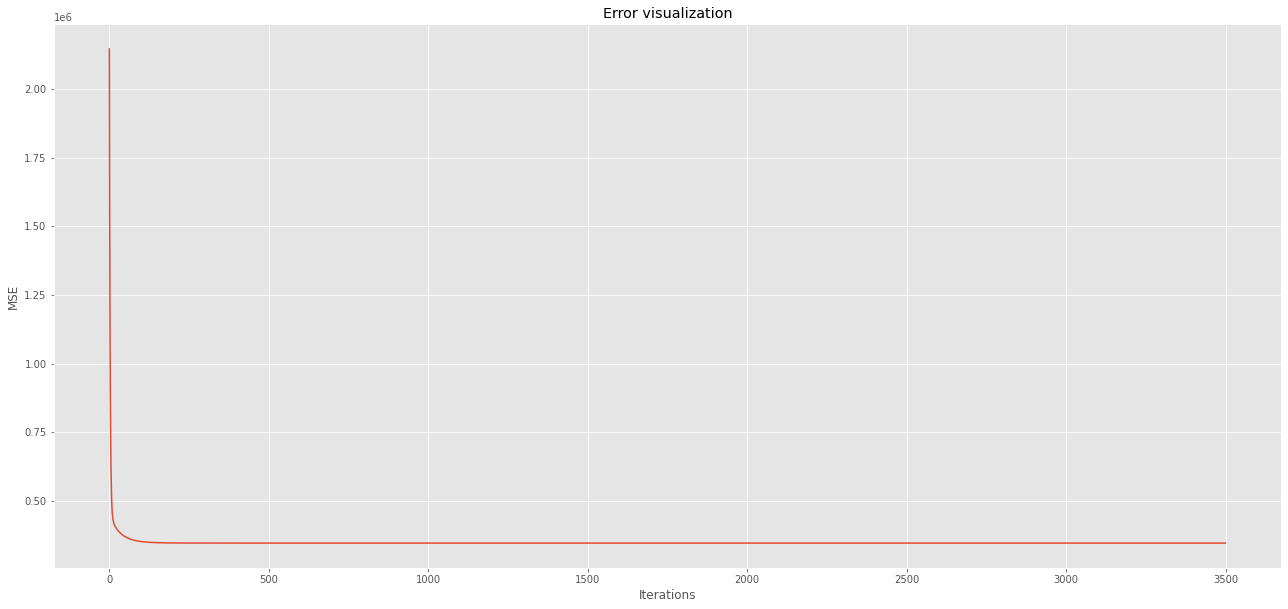

In [ ]:
dDescent = GradientDescent(Train_X, Train_Y, learning_rate=0.1, steps=3500, batch_size = 32, max_iters=10)

theta, error_list = dDescent.getTheta(), dDescent.getErList()

print("Last error was", error_list[-1])

dDescent.plotMSE()

Visualization on a random sample of predicted and actual label.

R2score -0.8157023165697499
Mean absolute error =  624.1511996295682
Mean Squared Error 736.3722489754599


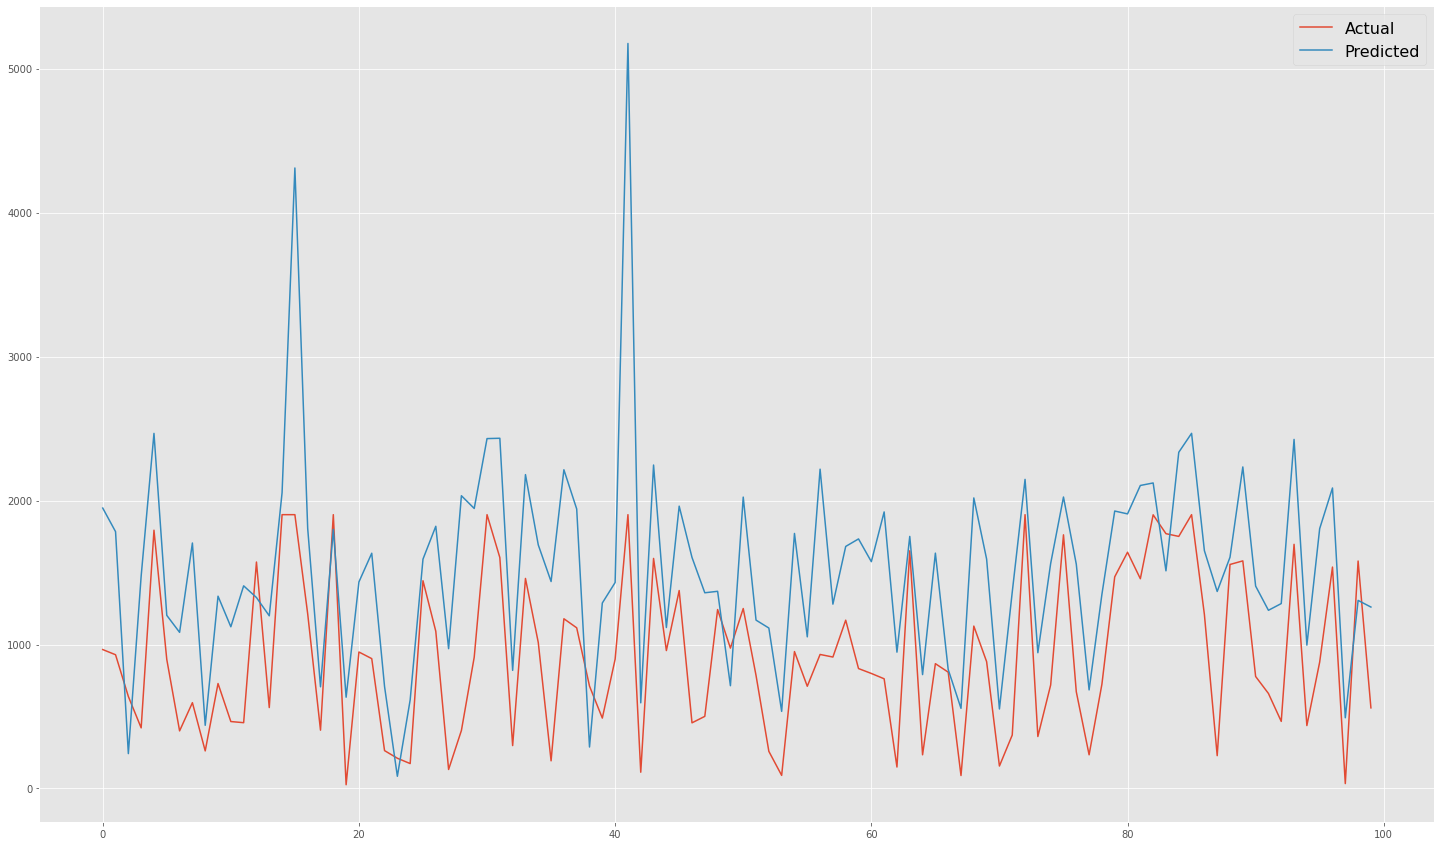

In [ ]:
pred = dDescent.predict(Test_X)

dDescent.ScoreAndPlot(Test_X, Test_Y, pred)

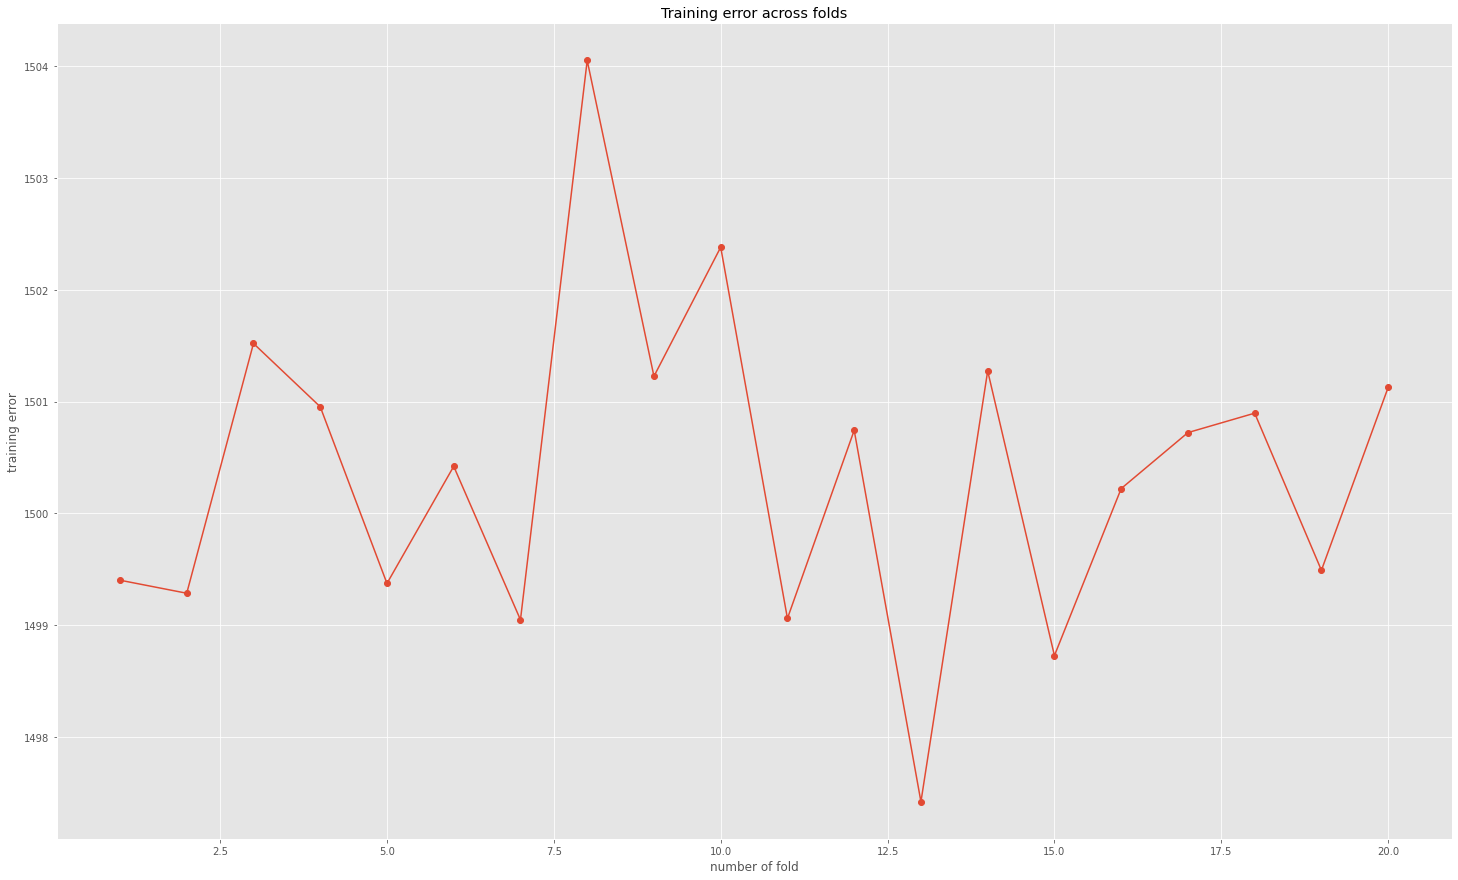

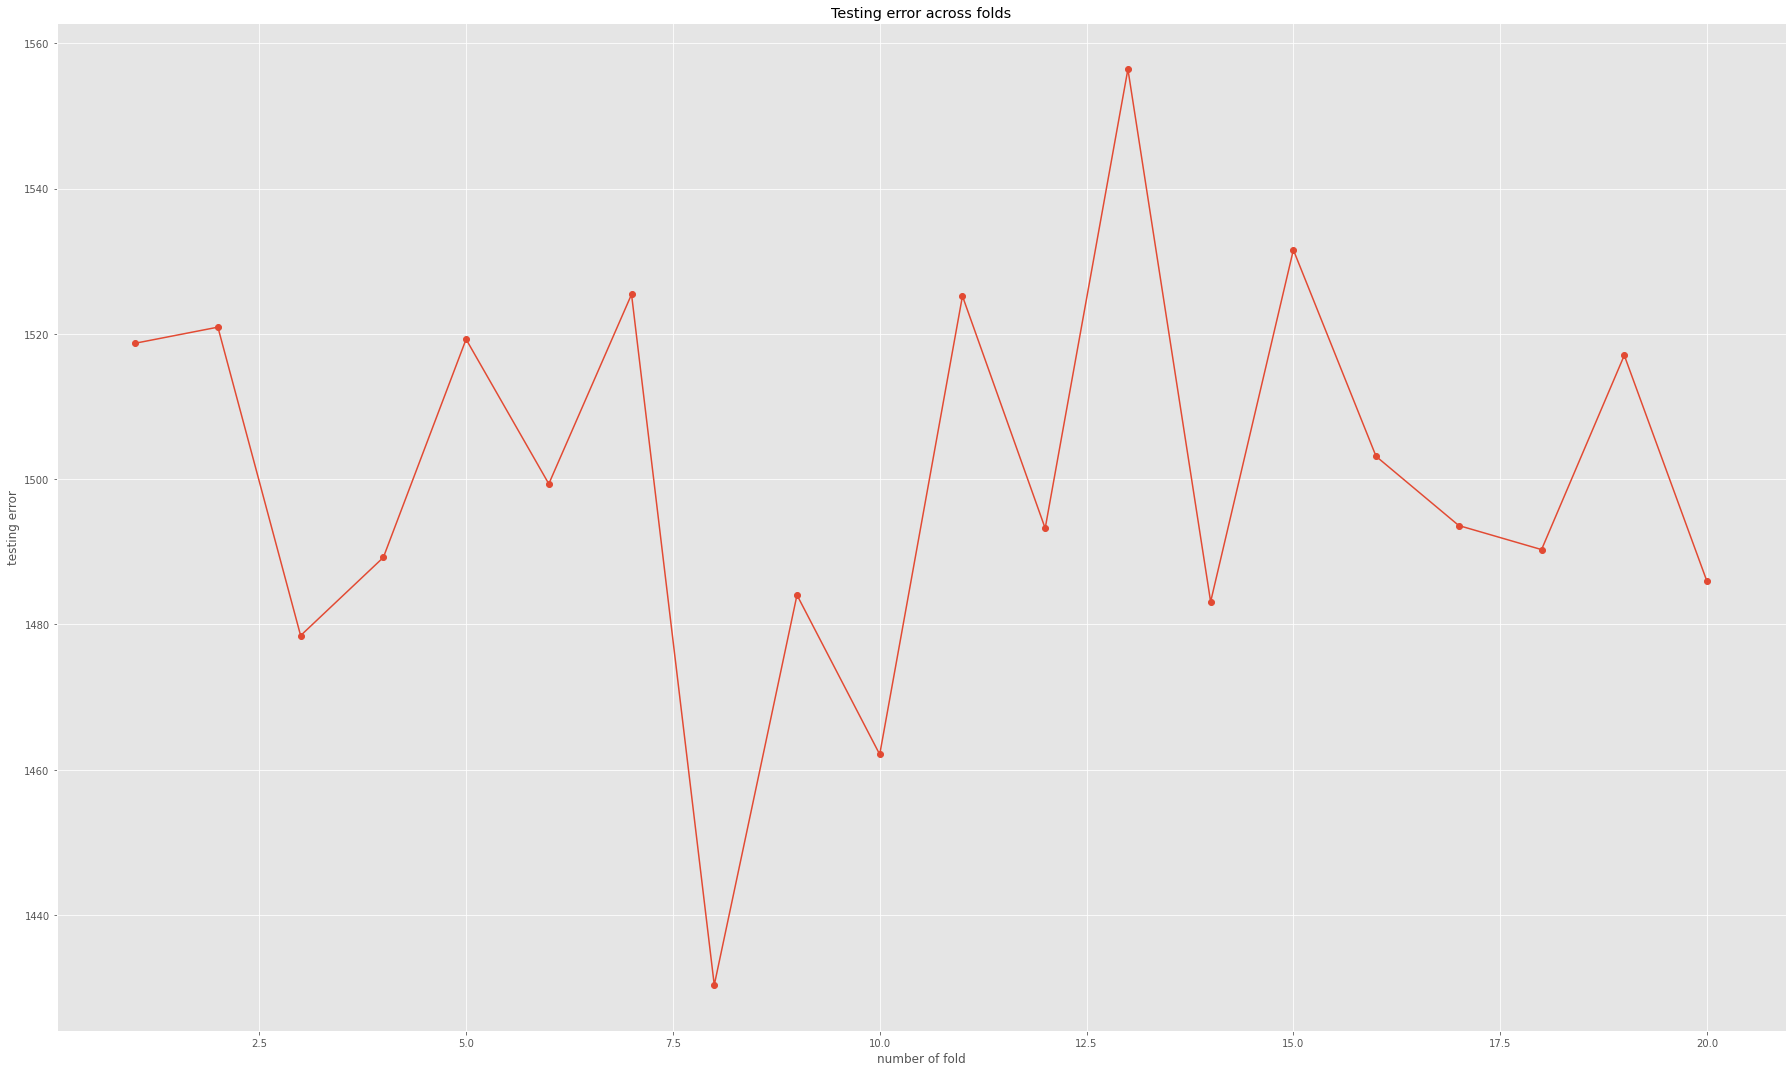

In [ ]:
kf = KFold(n_splits=20)
list_training_error = []
list_testing_error = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = GradientDescent(Train_X, Train_Y, learning_rate=0.1, steps=3500, batch_size = 32, max_iters=10)
    model.fit(X_train, y_train)
    y_train_data_pred = model.predict(X_train)
    y_test_data_pred = model.predict(X_test)
    fold_training_error = mean_absolute_error(y_train, y_train_data_pred) 
    fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error)

# plt.subplot(1,2,1)
plt.figure(figsize=(25,15))
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-')
plt.title('Training error across folds');
plt.xlabel('number of fold');
plt.ylabel('training error');
# plt.tight_layout()
plt.show()

# plt.subplot(1,2,2)
plt.figure(figsize=(25,15))
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-')
plt.title('Testing error across folds');
plt.xlabel('number of fold');
plt.ylabel('testing error');
plt.tight_layout()
plt.show()

Mini Batch Gradient Descent

Last error was [423461.54314781]


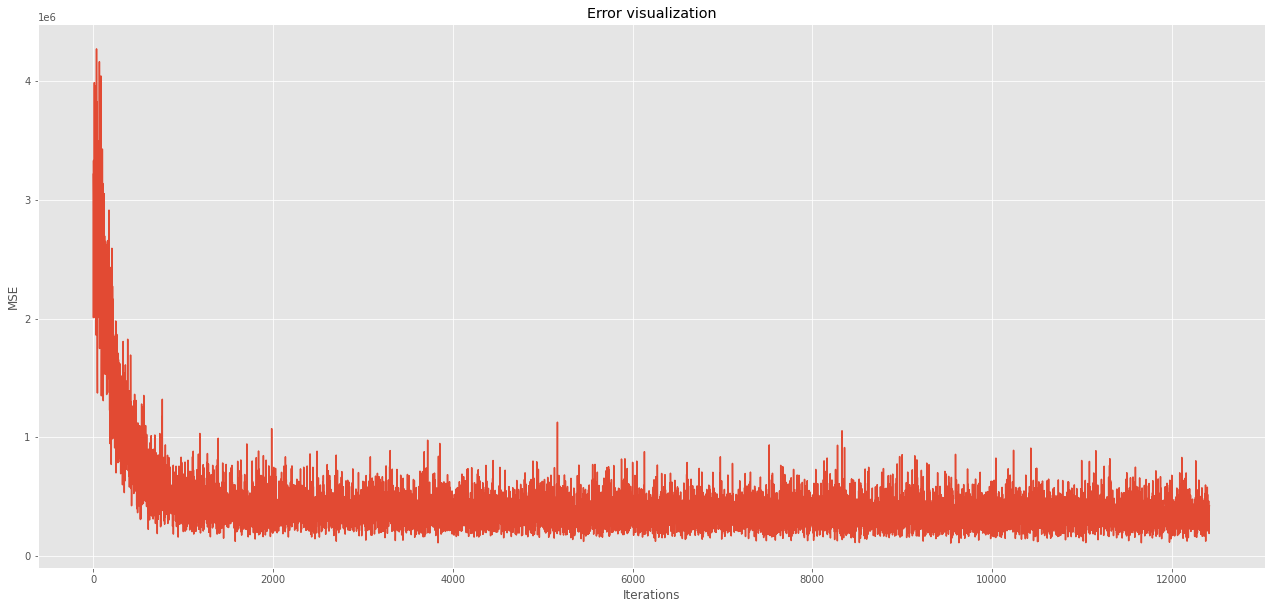

In [ ]:
mBDescent = GradientDescent(Train_X, Train_Y, learning_rate = 0.001, steps=1000, batch_size = 32, max_iters=30, typeGD='Mini Batch')

theta, error_list = mBDescent.getTheta(), mBDescent.getErList()

print("Last error was", error_list[-1])

mBDescent.plotMSE()

R2score -0.7766805542282682
Mean absolute error =  615.3251284852882
Mean Squared Error 728.4164817402335


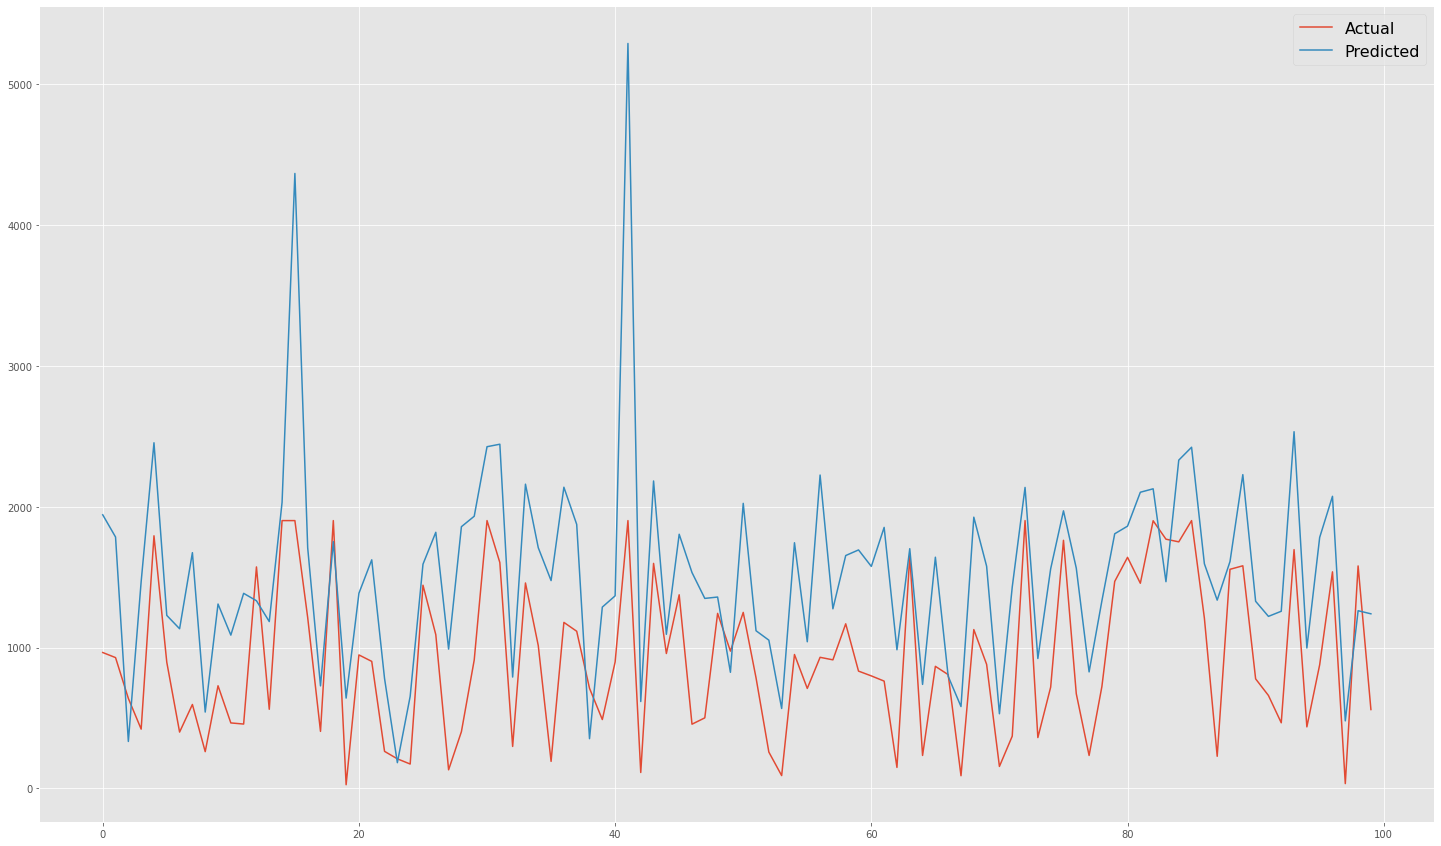

In [ ]:
pred = mBDescent.predict(Test_X)

mBDescent.ScoreAndPlot(Test_X, Test_Y, pred)

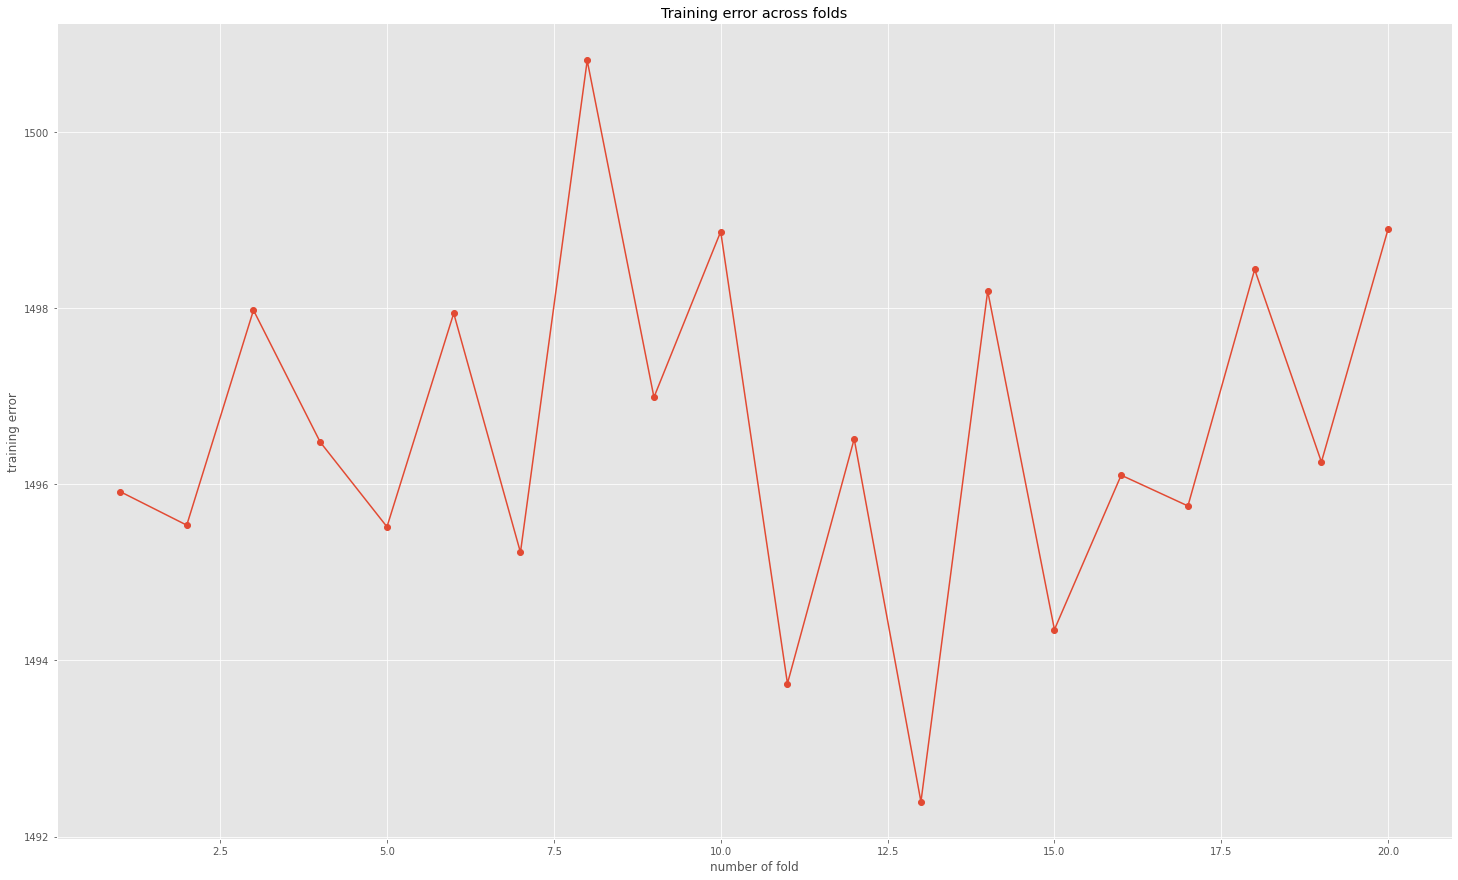

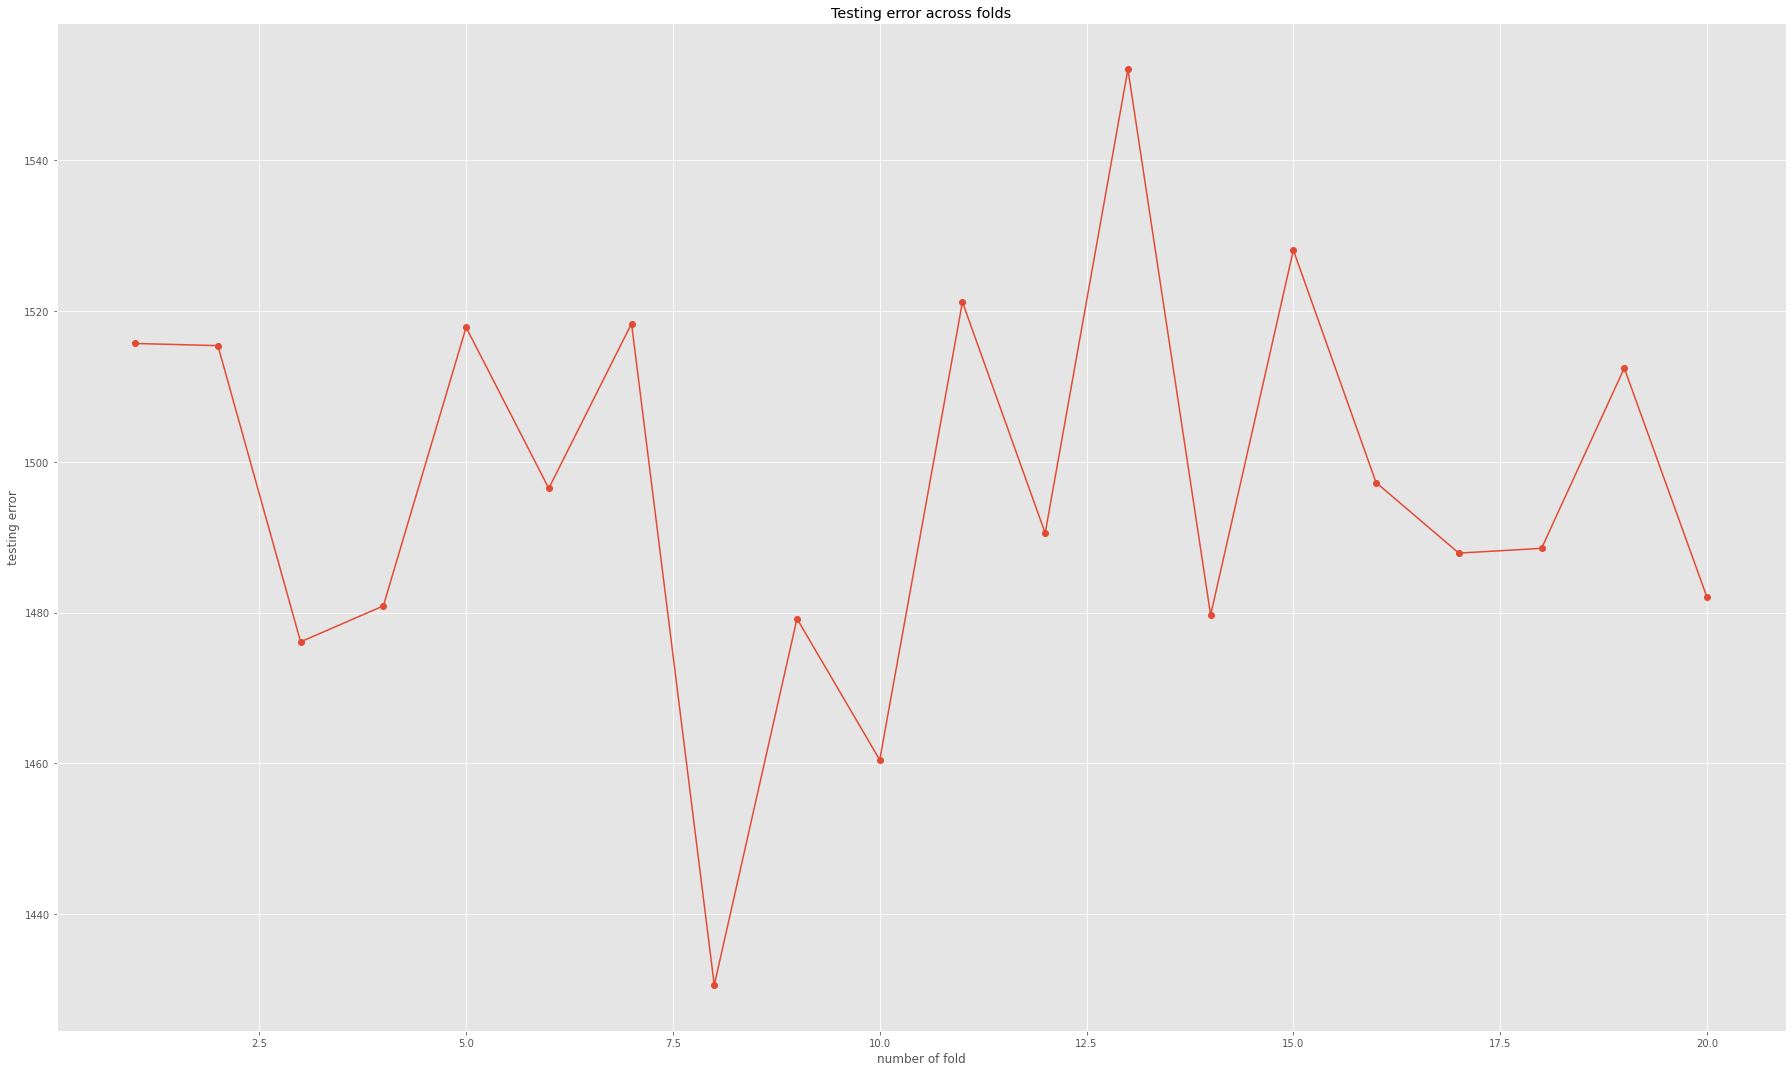

In [ ]:
kf = KFold(n_splits=20)
list_training_error = []
list_testing_error = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = GradientDescent(Train_X, Train_Y, learning_rate = 0.001, steps=1000, batch_size = 32, max_iters=30, typeGD='Mini Batch')
    model.fit(X_train, y_train)
    y_train_data_pred = model.predict(X_train)
    y_test_data_pred = model.predict(X_test)
    fold_training_error = mean_absolute_error(y_train, y_train_data_pred) 
    fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error)

# plt.subplot(1,2,1)
plt.figure(figsize=(25,15))
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-')
plt.title('Training error across folds');
plt.xlabel('number of fold');
plt.ylabel('training error');
# plt.tight_layout()
plt.show()

# plt.subplot(1,2,2)
plt.figure(figsize=(25,15))
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-')
plt.title('Testing error across folds');
plt.xlabel('number of fold');
plt.ylabel('testing error');
plt.tight_layout()
plt.show()

Last error was [423461.54314781]


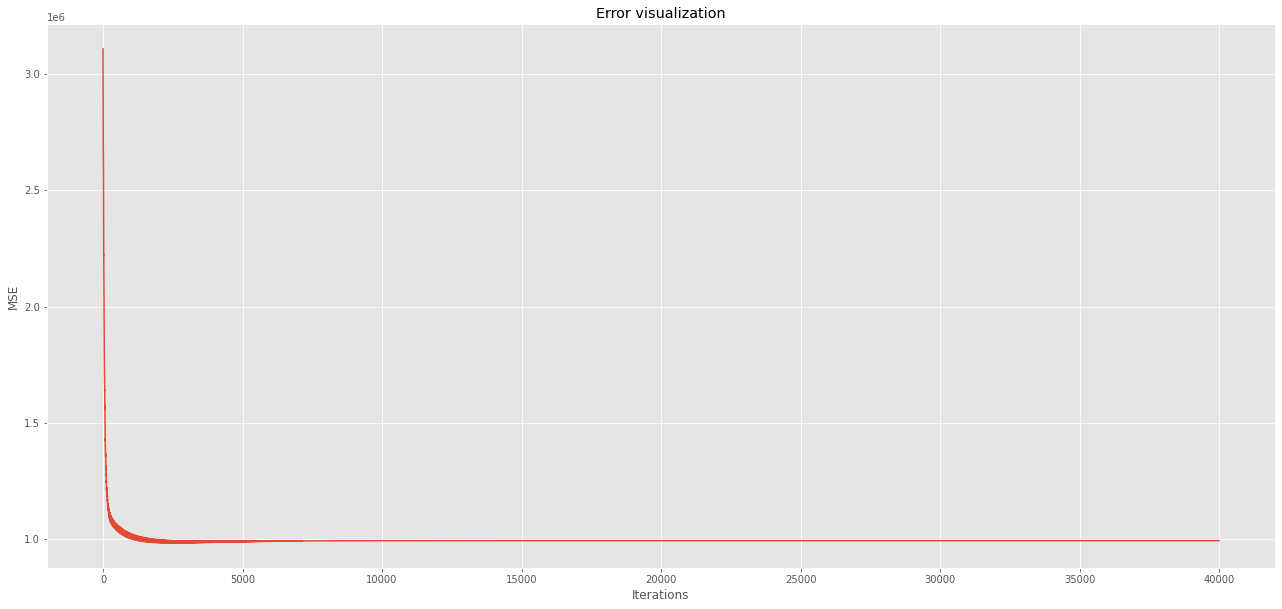

In [ ]:
SGD = GradientDescent(Train_X, Train_Y, learning_rate = 0.2, steps=1000, batch_size = 32, max_iters=30, typeGD='SGD', n_epochs=1000, k=40)
w, loss = SGD.getTheta(), SGD.getErList()

print("Last error was", error_list[-1])

SGD.plotMSE()

R2score -1.3449402875230887
Mean absolute error =  396.93916169730454
Mean Squared Error 836.8372112011598


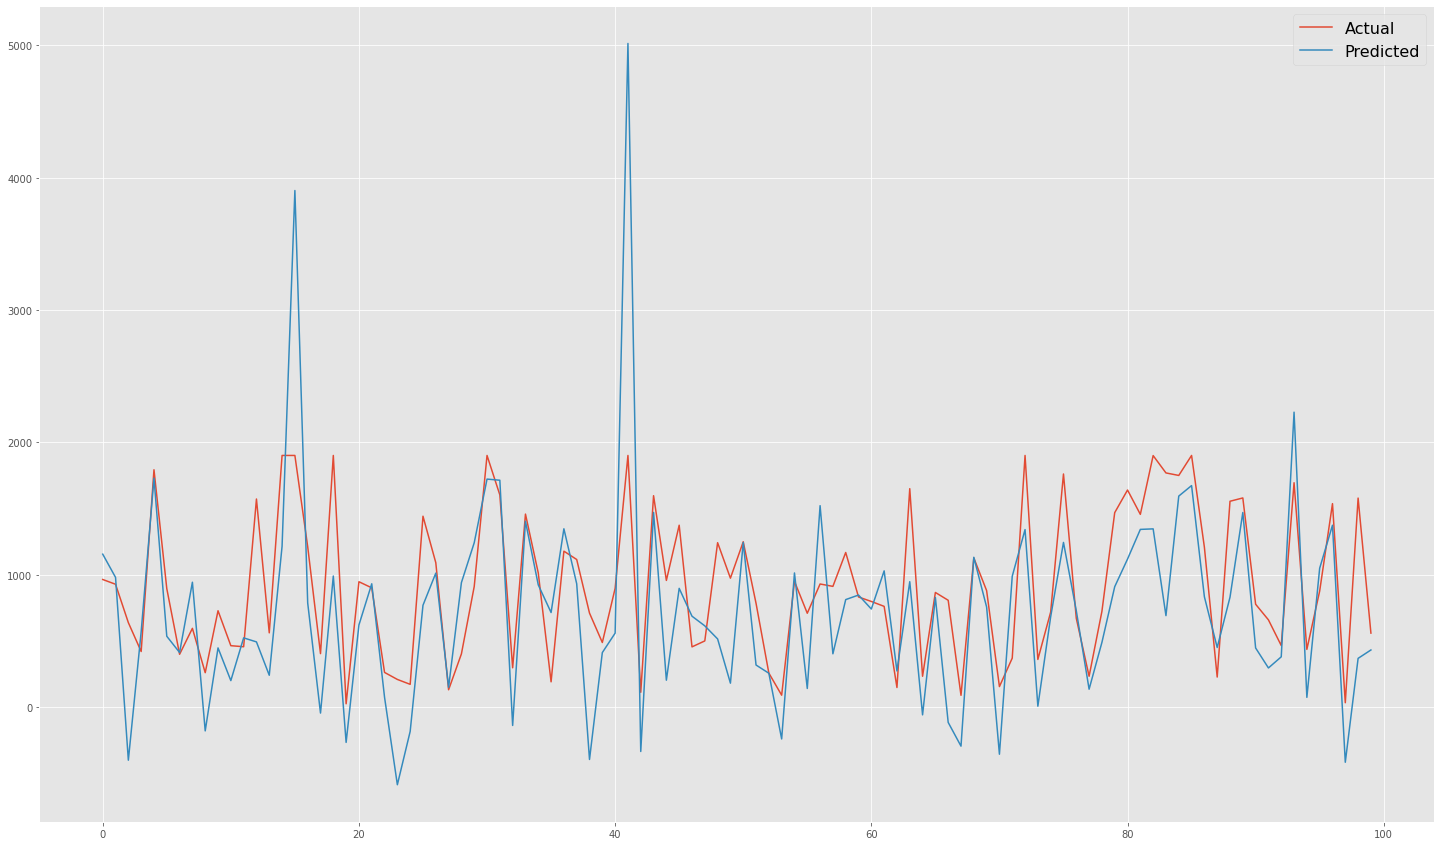

In [ ]:
pred = SGD.predict(Test_X)

SGD.ScoreAndPlot(Test_X, Test_Y, pred)

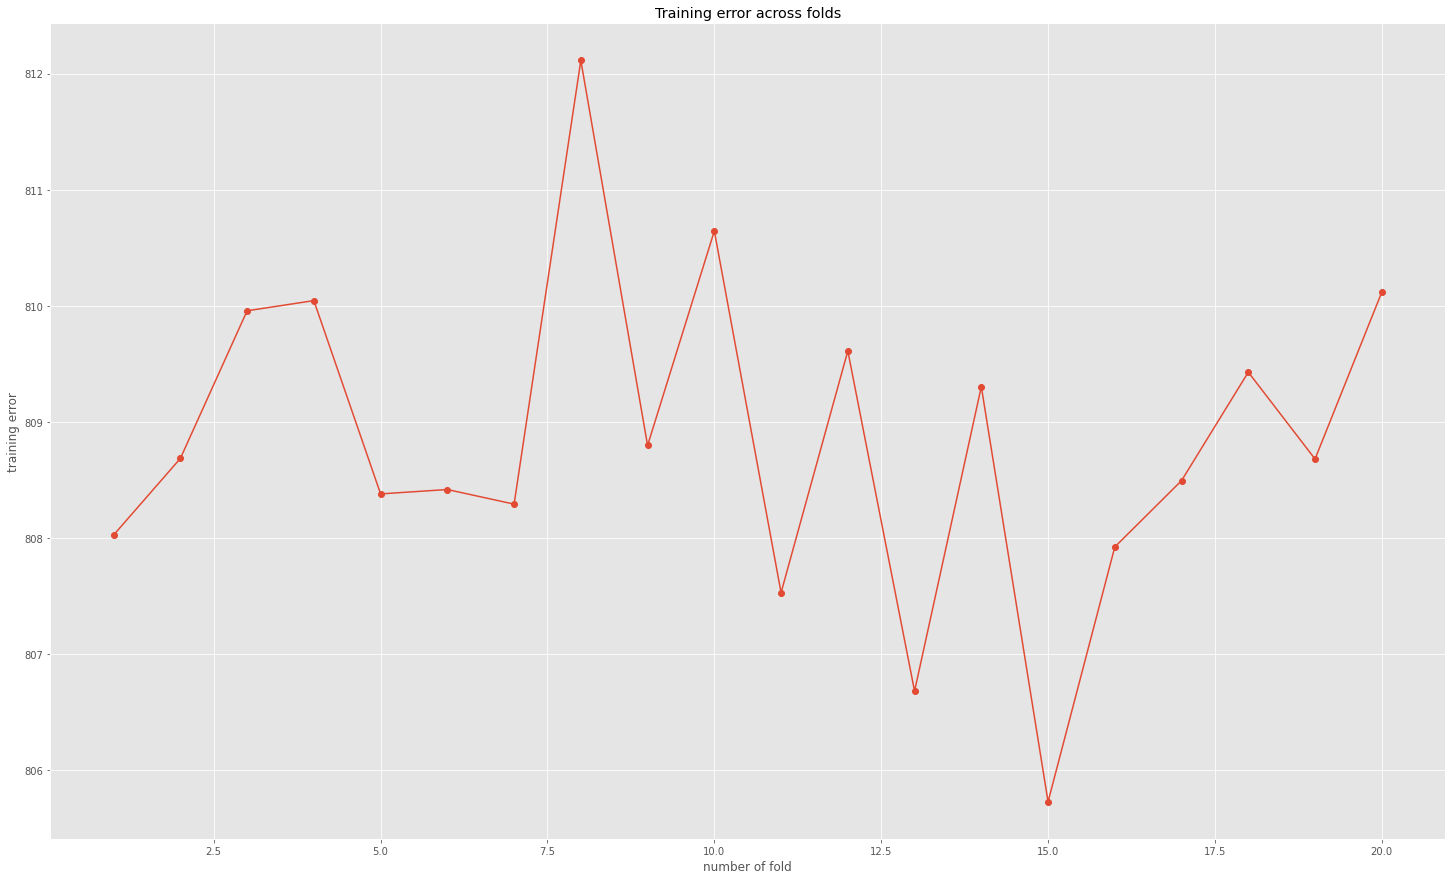

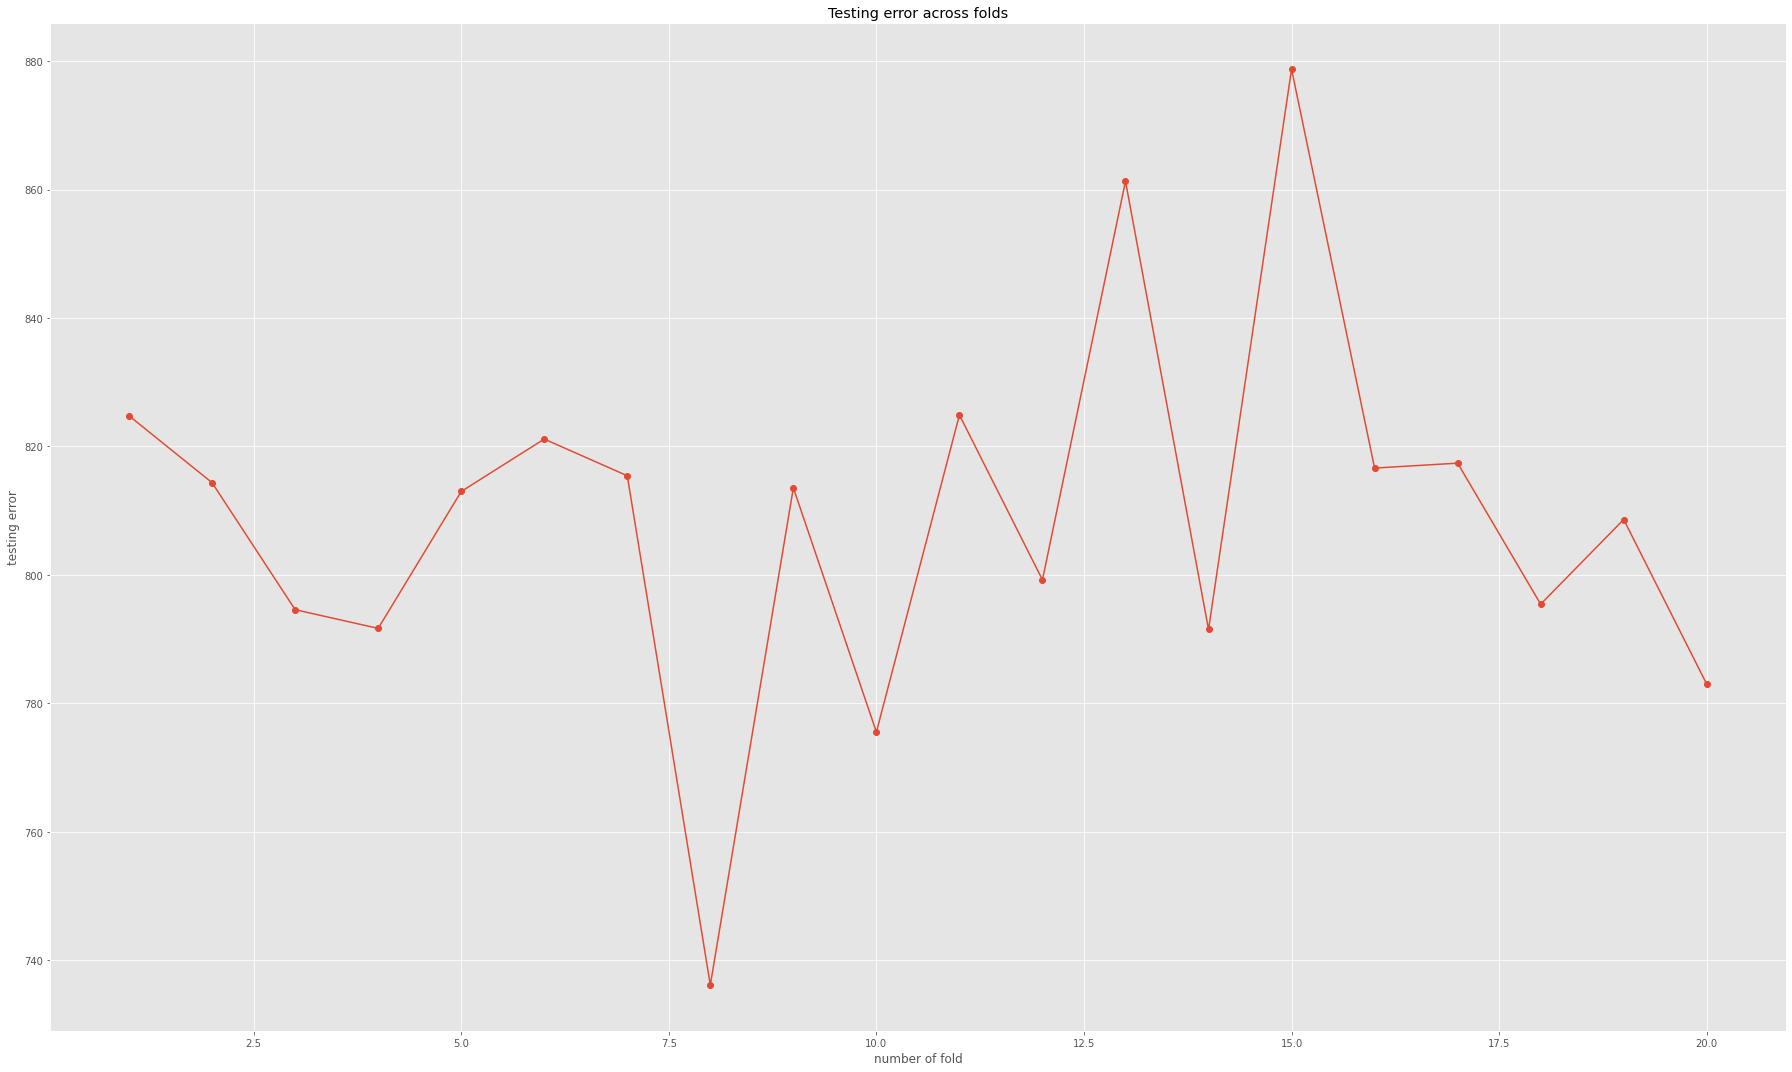

In [ ]:
kf = KFold(n_splits=20)
list_training_error = []
list_testing_error = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = GradientDescent(Train_X, Train_Y, learning_rate = 0.2, steps=1000, batch_size = 32, max_iters=30, typeGD='SGD', n_epochs=1000, k=40)
    model.fit(X_train, y_train)
    y_train_data_pred = model.predict(X_train)
    y_test_data_pred = model.predict(X_test)
    fold_training_error = mean_absolute_error(y_train, y_train_data_pred) 
    fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error)

# plt.subplot(1,2,1)
plt.figure(figsize=(25,15))
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-')
plt.title('Training error across folds');
plt.xlabel('number of fold');
plt.ylabel('training error');
# plt.tight_layout()
plt.show()

# plt.subplot(1,2,2)
plt.figure(figsize=(25,15))
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-')
plt.title('Testing error across folds');
plt.xlabel('number of fold');
plt.ylabel('testing error');
plt.tight_layout()
plt.show()